In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
from urllib.request import urlopen
import scipy.optimize
import random
from sklearn import svm, linear_model
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics



def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a


    

In [3]:
dataDir = "/Users/henryli/Desktop/CSE 258 Rec Sys/cse258/data/"
path = dataDir + "hotel_bookings_clean.csv"
df = pd.read_csv(path)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'agent_is_null',
       'company_is_null'],
      dtype='object')

In [187]:
month_one_hot_encode = pd.get_dummies(df.arrival_date_month)
month_one_hot_encode

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
86935,0,1,0,0,0,0,0,0,0,0,0,0
86936,0,1,0,0,0,0,0,0,0,0,0,0
86937,0,1,0,0,0,0,0,0,0,0,0,0
86938,0,1,0,0,0,0,0,0,0,0,0,0


In [55]:
#function to one hot encode and bind to df
def features_to_encode_and_bind(features_to_encode, df):
    for feature in features_to_encode:
        dummies = pd.get_dummies(df[[feature]])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([feature], axis=1)
    return df

new_df = df.loc[:, df.columns.intersection(['arrival_date_month','children',"previous_cancellations",'booking_changes'])]
X = features_to_encode_and_bind(['arrival_date_month'],new_df)
Y = df['is_canceled']

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #correct predictions
print("Precision:",metrics.precision_score(y_test, y_pred)) #if I say it was cancelled, how many were actually cancelled
print("Recall:",metrics.recall_score(y_test, y_pred)) #if they actually cancelled, how many was caught

[[15756    39]
 [ 5918    22]]
Accuracy: 0.725925925925926
Precision: 0.36065573770491804
Recall: 0.003703703703703704


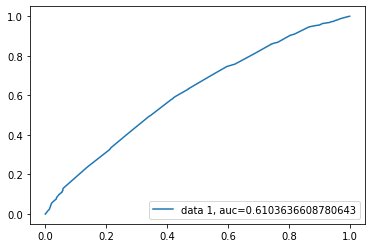

In [57]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [58]:
feature_cols = ['lead_time','arrival_date_year']
dummy_X = df[feature_cols]
Y = df['is_canceled']

In [45]:
dummy_X_train,dummy_X_test,dummy_y_train,dummy_y_test=train_test_split(dummy_X,Y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(dummy_X_train,dummy_y_train)
dummy_y_pred=logreg.predict(dummy_X_test)


In [46]:
dummy_cnf_matrix = metrics.confusion_matrix(dummy_y_test, dummy_y_pred)
print(dummy_cnf_matrix)
print("Accuracy:",metrics.accuracy_score(dummy_y_test, dummy_y_pred)) #correct predictions
print("Precision:",metrics.precision_score(dummy_y_test, dummy_y_pred)) #if I say it was cancelled, how many were actually cancelled
print("Recall:",metrics.recall_score(dummy_y_test, dummy_y_pred)) #if they actually cancelled, how many was caught

[[15487   308]
 [ 5659   281]]
Accuracy: 0.7254658385093168
Precision: 0.4770797962648557
Recall: 0.0473063973063973


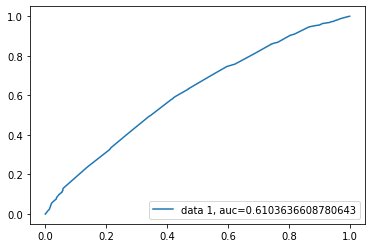

In [47]:
#AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.
dummy_y_pred_proba = logreg.predict_proba(dummy_X_test)[::,1]
dum_fpr, dum_tpr, _ = metrics.roc_curve(dummy_y_test,  y_pred_proba)
dum_auc = metrics.roc_auc_score(dummy_y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(dum_auc))
plt.legend(loc=4)
plt.show()

In [51]:
logreg.predict_proba(dummy_X_test)

array([[0.7455301 , 0.2544699 ],
       [0.77968274, 0.22031726],
       [0.78967351, 0.21032649],
       ...,
       [0.52358328, 0.47641672],
       [0.6254378 , 0.3745622 ],
       [0.79327459, 0.20672541]])